In [284]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import KFold
from sklearn import linear_model
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import collections, numpy
#import SMOTE_2 as smote

In [285]:
data = pd.read_excel("quote_data_working.xlsx", sheetname="Sheet1")

data.count()
data.head()

,QuoteNumber,QuoteStatus,QuoteDay,QuoteDate,QuoteHour,QuoteTimeofDay,QuoteTime,prior_insurance_carrier_cd,PriorLimits,insurance_score,...,FollowUpIndicatorPriority,ADPF Indicator Group,DVS Group Group,DVS Report Status Gruop,IID Status Message Group,IID Hit Color,IID Report Status,Risk Group Name Group,Verification Path Name Group,Verification Path Reason
0,Q7304945907,Draft,Friday,"Friday, January 12, 2018",1 PM,Afternoon,13:36:53,NaN,NaN,NaN,...,2,No,Low Risk,Success,Record(s) Found,Yellow,Success,Group A,Manual + Verification,d. IID Risk Group: A
1,Q3999407819,Draft,Friday,"Friday, January 12, 2018",1 PM,Afternoon,13:38:12,GEICO ADVANTAGE INS,15000/30000,NaN,...,3,Yes,Low Risk,Success,Record(s) Found,Green,Success,Group C,Automated,NaN
2,Q5081290309,Draft,Saturday,"Saturday, January 13, 2018",7 PM,Evening,19:33:30,CSAA MID-ATLANTIC IC,100000/300000,NaN,...,1,Yes,Low Risk,Success,Record(s) Found,Green,Success,Group C,Automated,NaN
3,Q2793042841,Draft,Sunday,"Sunday, January 14, 2018",6 PM,Evening,18:52:37,OMNI INSURANCE COMPA,15000/30000,NaN,...,3,Yes,Low Risk,Success,Record(s) Found,Green,Success,Group C,Automated,NaN
4,Q8593473978,Draft,Monday,"Monday, January 15, 2018",8 AM,Morning,08:28:26,NaN,NaN,NaN,...,2,No,Low Risk,Success,Record(s) Found,Yellow,Success,Group A,Manual + Verification,d. IID Risk Group: A


In [286]:
#print(len(data['prior_insurance_carrier_cd'].unique())#.count())
data['prior_insurance_carrier_cd'].unique()
prior_ins=data['prior_insurance_carrier_cd']
#type(prior_ins)
#type(data['prior_insurance_carrier_cd'])

In [287]:
prior_ins_definition=['GEICO','ERIE', 'STATE FARM', 'PROGRESSIVE','AAA','AGENCY','ALLSTATE','ALLIED','AMICA','CSAA',
                     'FARMERS','HARTFORD','GRANGE','HRTFRD','MAPFRE','LIBERTY','LM','MET','NATIONWIDE','TRAVELERS','TRAVELLERS','USAA']

In [288]:
#len(prior_ins)
#type(prior_ins)
pi=list(prior_ins)

In [289]:
for n in range(len(pi)):
    i=str(pi[n]).upper()
    j=([sub for sub in prior_ins_definition if sub in i],i)
    if(j[0])==[]:
        pi[n]=j[1]
        #print(type(i))
    else:
        pi[n]=j[0][0]
    #print(i)
    
        #for sub in prior_ins_definition:
     #   if sub in i:
        

    #j=[i for sub in prior_ins_definition if sub not in i]#, i]
    #print(j)
    #else:
        #print("false")
    #print(any(substring in string for substring in substring_list))

In [290]:
newPi = pd.Series(pi)
data['new_prior_ins'] = newPi.values
print(data['new_prior_ins'].head()) # changed common insurance names and grouped to one kind

#se = pd.Series(mylist)

0                     NAN
1                   GEICO
2                    CSAA
3    OMNI INSURANCE COMPA
4                     NAN
Name: new_prior_ins, dtype: object


In [291]:
def flatten(ins_name, ins_list):
    new_list=[]
    for i in range(len(ins_list)):
        #print(ins_list[i])
        if(str(ins_list[i]) == str(ins_name)):
            new_list.append(1)
            #print("here")
        else:
            #new_list[i]=0
            new_list.append(0)
    #print(ins_list)
    return new_list


In [292]:
#prior_ins_definition=['GEICO','ERIE', 'STATE FARM', 'PROGRESSIVE','AAA','AGENCY','ALLSTATE','ALLIED','AMICA','CSAA'
#                     'FARMERS','HARTFORD','GRANGE','HRTFRD','MAPFRE','LIBERTY','LM','MET','NATIONWIDE','TRAVELERS','TRAVELLERS',
#                      'USAA']


data['GEICO'], data['PROGRESSIVE'] = [flatten('GEICO',list(data['new_prior_ins'])),flatten('PROGRESSIVE',list(data['new_prior_ins']))]
data['ERIE'], data['STATE FARM'] = [flatten('ERIE',list(data['new_prior_ins'])),flatten('STATE FARM',list(data['new_prior_ins']))]
data['AAA'], data['AGENCY'] = [flatten('AAA',list(data['new_prior_ins'])),flatten('AGENCY',list(data['new_prior_ins']))]
data['ALLSTATE'], data['ALLIED'] = [flatten('ALLSTATE',list(data['new_prior_ins'])),flatten('ALLIED',list(data['new_prior_ins']))]
data['AMICA'], data['CSAA'] = [flatten('AMICA',list(data['new_prior_ins'])),flatten('CSAA',list(data['new_prior_ins']))]
data['FARMERS'], data['HARTFORD'] = [flatten('FARMERS',list(data['new_prior_ins'])),flatten('HARTFORD',list(data['new_prior_ins']))]
data['GRANGE'], data['HRTFRD'] = [flatten('GRANGE',list(data['new_prior_ins'])),flatten('HRTFRD',list(data['new_prior_ins']))]
data['MAPFRE'], data['LIBERTY'] = [flatten('MAPFRE',list(data['new_prior_ins'])),flatten('LIBERTY',list(data['new_prior_ins']))]
data['LM'], data['MET'] = [flatten('LM',list(data['new_prior_ins'])),flatten('MET',list(data['new_prior_ins']))]
data['NATIONWIDE'], data['TRAVELERS'] = [flatten('NATIONWIDE',list(data['new_prior_ins'])),flatten('TRAVELERS',list(data['new_prior_ins']))]
data['USAA'], data['NAN'] = [flatten('USAA',list(data['new_prior_ins'])),flatten('NAN',list(data['new_prior_ins']))]

In [302]:
data.columns.values


array(['QuoteNumber', 'QuoteStatus', 'QuoteDate', 'QuoteHour',
       'QuoteTimeofDay', 'QuoteTime', 'PriorLimits', 'insurance_score',
       'MIN_of_qut_prd_id', 'EPID', 'cmpgn_nm', 'personleadsource',
       'FRScore', 'UWCategoryName', 'totl_cost_rpt_amt',
       'totl_prem_rpt_amt', 'txn_cost_rpt_amt', 'txn_prem_rpt_amt',
       'qut_loss_hist_type_cd', 'qut_loss_hist_type_nm', 'zip', 'adpf_ind',
       'primary_insured_indicator', 'DateOfBirth', 'CountDriver',
       'CountVehicle', 'DVSGroup', 'DVSReportStatus',
       'InstantIDStatusMessage', 'InstantIDReportStatus',
       'InstantIDHitColor', 'RiskGroupName', 'VerificationPathName',
       'QuoteC.Party.USA_ProductAdvisor__c', 'QuoteC.USA_CampaignId__c',
       'QuoteC.USA_PolicyEffectiveDate__c', 'QuoteC.USA_PolicyNumber__c',
       'QuoteC.USA_PremiumMonthly__c', 'QuoteC.USA_PremiumTotal__c',
       'QuoteCampaignName', 'QuoteCampaignType', 'QuoteSourceType',
       'AgeDecimal', 'Age', 'Party.USA_Score__c', 'UWCategoryName

In [294]:
#temp=data[,-'prior_insurance_carrier_cd']
data=data.drop(['prior_insurance_carrier_cd'],axis=1)
data=data.drop(['new_prior_ins'],axis=1)
#temp.head()

In [297]:
days=list(data['QuoteDay'].unique())

for i in range(len(days)):
    #print(prior_ins_definition[i])
    #newDays=str('\''+days[i]+'\'')
    newDays=str(days[i])
    data[newDays]=flatten(newDays,list(data['QuoteDay']))
data.head()

In [299]:
data=data.drop(['QuoteDay'],axis=1)
data.head()

,QuoteNumber,QuoteStatus,QuoteDate,QuoteHour,QuoteTimeofDay,QuoteTime,PriorLimits,insurance_score,MIN_of_qut_prd_id,EPID,...,TRAVELERS,USAA,NAN,Friday,Saturday,Sunday,Monday,Tuesday,Wednesday,Thursday
0,Q7304945907,Draft,"Friday, January 12, 2018",1 PM,Afternoon,13:36:53,NaN,NaN,9424,0013600001ZcSXMAA3,...,0,0,1,1,0,0,0,0,0,0
1,Q3999407819,Draft,"Friday, January 12, 2018",1 PM,Afternoon,13:38:12,15000/30000,NaN,9425,0013600001ZcSb8AAF,...,0,0,0,1,0,0,0,0,0,0
2,Q5081290309,Draft,"Saturday, January 13, 2018",7 PM,Evening,19:33:30,100000/300000,NaN,9433,0013600001ZceXAAAZ,...,0,0,0,0,1,0,0,0,0,0
3,Q2793042841,Draft,"Sunday, January 14, 2018",6 PM,Evening,18:52:37,15000/30000,NaN,9442,0013600001ZcjgZAAR,...,0,0,0,0,0,1,0,0,0,0
4,Q8593473978,Draft,"Monday, January 15, 2018",8 AM,Morning,08:28:26,NaN,NaN,9448,0013600001ZcmWyAAJ,...,0,0,1,0,0,0,1,0,0,0


In [300]:
time=list(data['QuoteTimeofDay'].unique())

In [303]:
for i in range(len(time)):
    #print(prior_ins_definition[i])
    #newDays=str('\''+days[i]+'\'')
    newDays=str(time[i])
    data[newDays]=flatten(newDays,list(data['QuoteTimeofDay']))
data.head()

,QuoteNumber,QuoteStatus,QuoteDate,QuoteHour,QuoteTimeofDay,QuoteTime,PriorLimits,insurance_score,MIN_of_qut_prd_id,EPID,...,Saturday,Sunday,Monday,Tuesday,Wednesday,Thursday,Afternoon,Evening,Morning,Late Night
0,Q7304945907,Draft,"Friday, January 12, 2018",1 PM,Afternoon,13:36:53,NaN,NaN,9424,0013600001ZcSXMAA3,...,0,0,0,0,0,0,1,0,0,0
1,Q3999407819,Draft,"Friday, January 12, 2018",1 PM,Afternoon,13:38:12,15000/30000,NaN,9425,0013600001ZcSb8AAF,...,0,0,0,0,0,0,1,0,0,0
2,Q5081290309,Draft,"Saturday, January 13, 2018",7 PM,Evening,19:33:30,100000/300000,NaN,9433,0013600001ZceXAAAZ,...,1,0,0,0,0,0,0,1,0,0
3,Q2793042841,Draft,"Sunday, January 14, 2018",6 PM,Evening,18:52:37,15000/30000,NaN,9442,0013600001ZcjgZAAR,...,0,1,0,0,0,0,0,1,0,0
4,Q8593473978,Draft,"Monday, January 15, 2018",8 AM,Morning,08:28:26,NaN,NaN,9448,0013600001ZcmWyAAJ,...,0,0,1,0,0,0,0,0,1,0


In [304]:
data=data.drop(['QuoteTimeofDay'],axis=1)
data.head()

,QuoteNumber,QuoteStatus,QuoteDate,QuoteHour,QuoteTime,PriorLimits,insurance_score,MIN_of_qut_prd_id,EPID,cmpgn_nm,...,Saturday,Sunday,Monday,Tuesday,Wednesday,Thursday,Afternoon,Evening,Morning,Late Night
0,Q7304945907,Draft,"Friday, January 12, 2018",1 PM,13:36:53,NaN,NaN,9424,0013600001ZcSXMAA3,Everquote Clicks,...,0,0,0,0,0,0,1,0,0,0
1,Q3999407819,Draft,"Friday, January 12, 2018",1 PM,13:38:12,15000/30000,NaN,9425,0013600001ZcSb8AAF,EverquoteClicks,...,0,0,0,0,0,0,1,0,0,0
2,Q5081290309,Draft,"Saturday, January 13, 2018",7 PM,19:33:30,100000/300000,NaN,9433,0013600001ZceXAAAZ,Everquote Clicks,...,1,0,0,0,0,0,0,1,0,0
3,Q2793042841,Draft,"Sunday, January 14, 2018",6 PM,18:52:37,15000/30000,NaN,9442,0013600001ZcjgZAAR,Everquote Clicks,...,0,1,0,0,0,0,0,1,0,0
4,Q8593473978,Draft,"Monday, January 15, 2018",8 AM,08:28:26,NaN,NaN,9448,0013600001ZcmWyAAJ,Everquote Clicks,...,0,0,1,0,0,0,0,0,1,0


In [306]:
data['Target']=flatten('Quoted',list(data['QuoteStatus']))

In [309]:
data.head()

,QuoteNumber,QuoteStatus,QuoteDate,QuoteHour,QuoteTime,PriorLimits,insurance_score,MIN_of_qut_prd_id,EPID,cmpgn_nm,...,Sunday,Monday,Tuesday,Wednesday,Thursday,Afternoon,Evening,Morning,Late Night,Target
0,Q7304945907,Draft,"Friday, January 12, 2018",1 PM,13:36:53,NaN,NaN,9424,0013600001ZcSXMAA3,Everquote Clicks,...,0,0,0,0,0,1,0,0,0,0
1,Q3999407819,Draft,"Friday, January 12, 2018",1 PM,13:38:12,15000/30000,NaN,9425,0013600001ZcSb8AAF,EverquoteClicks,...,0,0,0,0,0,1,0,0,0,0
2,Q5081290309,Draft,"Saturday, January 13, 2018",7 PM,19:33:30,100000/300000,NaN,9433,0013600001ZceXAAAZ,Everquote Clicks,...,0,0,0,0,0,0,1,0,0,0
3,Q2793042841,Draft,"Sunday, January 14, 2018",6 PM,18:52:37,15000/30000,NaN,9442,0013600001ZcjgZAAR,Everquote Clicks,...,1,0,0,0,0,0,1,0,0,0
4,Q8593473978,Draft,"Monday, January 15, 2018",8 AM,08:28:26,NaN,NaN,9448,0013600001ZcmWyAAJ,Everquote Clicks,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
#xx = ['property_type', 'room_type', "bed_type",
# "cancellation_policy","is_location_exact"]
#X = pd.get_dummies(X, columns = xx)
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)


In [322]:
prior_ins_definition=['GEICO','ERIE', 'STATE FARM', 'PROGRESSIVE','AAA','AGENCY','ALLSTATE','ALLIED','AMICA','CSAA',
                     'FARMERS','HARTFORD','GRANGE','HRTFRD','MAPFRE','LIBERTY','LM','MET','NATIONWIDE','TRAVELERS',
                      'USAA']#'TRAVELLERS','USAA']

In [336]:
required=[]
required.extend(prior_ins_definition)
required.extend(days)
required.extend(time)
#required.extend(["Target"])

In [337]:
print(required)

['GEICO', 'ERIE', 'STATE FARM', 'PROGRESSIVE', 'AAA', 'AGENCY', 'ALLSTATE', 'ALLIED', 'AMICA', 'CSAA', 'FARMERS', 'HARTFORD', 'GRANGE', 'HRTFRD', 'MAPFRE', 'LIBERTY', 'LM', 'MET', 'NATIONWIDE', 'TRAVELERS', 'USAA', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Afternoon', 'Evening', 'Morning', 'Late Night']


In [342]:
newdata2 = data[required]
x=newdata2
y=data['Target']

In [339]:
newdata2.head()

,GEICO,ERIE,STATE FARM,PROGRESSIVE,AAA,AGENCY,ALLSTATE,ALLIED,AMICA,CSAA,...,Saturday,Sunday,Monday,Tuesday,Wednesday,Thursday,Afternoon,Evening,Morning,Late Night
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [344]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import xgboost as xgb
# from statsmodels.stats.outliers_influence import summary_table
# from sklearn import svm
# from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

C:\Users\suchi\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [345]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.33, random_state = 42)

In [346]:
rf = RandomForestRegressor(oob_score = True, n_estimators = 1000, max_depth = 30, min_samples_split = 15, max_features = "sqrt")
print("\n Fitting Random Forest model...")
fit = rf.fit(X_train, Y_train)
print("\n Making Random Forest predictions...")
predictions = rf.predict(X_test)
print()
print("RMSE: ", mean_squared_error(Y_test, predictions), "\n")
print("R^2: ", r2_score(Y_test, predictions), "\n")


 Fitting Random Forest model...

 Making Random Forest predictions...

RMSE:  0.227970822117 

R^2:  0.0217426012044 



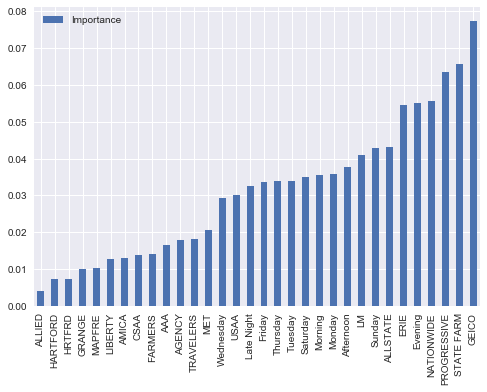

In [347]:
feature_names = X_train.columns
importances = rf.feature_importances_
feats = {}
figComp= plt.figure(figsize=(50,20))
for feature, importance in zip(feature_names, importances):
    feats[feature] = importance #add the name/value pair 
feature_importance_df = pd.DataFrame.from_dict(feats, orient = 'index').rename(columns = {0: 'Importance'})
feature_importance_df = feature_importance_df.sort_values(by = 'Importance')
feature_importance_df.plot(kind = 'bar')
plt.show()

In [226]:
#pins=prior_ins_definition[2]
#pins=str('\''+pins+'\'')
#data[pins]=[flatten(pins,list(data['new_prior_ins']))]


In [239]:
#nn=flatten(ins_name,aa)
#nn
#if i in nn:
 #   if i==1:
  #      print(i)

In [237]:
#data.head()

In [201]:
aa=list(data['new_prior_ins'])
aa[1]=='GEICO'
ins_name='GEICO'

In [178]:
#data = pd.DataFrame({
 #   'GEICO': [flatten('GEICO',list(data['new_prior_ins']))],
  #  'PROGRESSIVE': [flatten('PROGRESSIVE',data['new_prior_ins']))]
#})

C:\Users\suchi\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\suchi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
